<a href="https://colab.research.google.com/github/keshab97/100DaysOfMLcode/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

True

In [0]:
!mkdir drive

In [0]:
!google-drive-ocamlfuse drive

In [6]:
import os
os.path.isfile("drive/data/fashion-mnist_train.csv")

True

In [0]:
#import all libraries needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

# table or dataframe for test and ttrain dataset 
fashion_train_dataset = pd.read_csv('drive/data/fashion-mnist_train.csv',sep=',')
fashion_test_dataset = pd.read_csv('drive/data/fashion-mnist_test.csv', sep = ',')



In [11]:
fashion_train_dataset.head()
fashion_train_dataset.tail()
fashion_test_dataset.head()
fashion_test_dataset.tail()
fashion_train_dataset.shape
fashion_test_dataset.shape

(10000, 785)

In [13]:
training = np.array(fashion_train_dataset, dtype = 'float32')
testing = np.array(fashion_test_dataset, dtype='float32')
training.shape
print(training)
print(testing)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


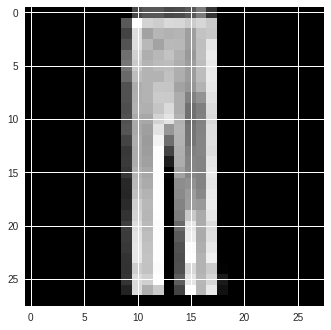

In [16]:
#for diaplaying any random image from 60000 images
image_no = random.randint(1,60000) 
plt.imshow( training[image_no,1:].reshape((28,28)) )
plt.imshow( training[image_no,1:].reshape((28,28)) , cmap = 'gray')

In [21]:
label = training[image_no,0]
print(label)

#give some numer of images in matrix form to easy to visualize
width = 5
length = 5

1.0


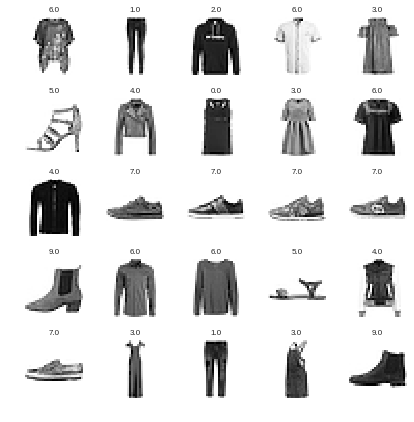

In [22]:
fig, axes = plt.subplots(length,width, figsize = (7,7))
axes = axes.ravel() 
n_training = len(training) 
for i in np.arange(0, width *length): # create evenly spaces variables 
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [25]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(str(X_train.shape) + '"  "'+str(y_train.shape))

(48000, 784)"  "(48000,)


In [28]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_train.shape
X_test.shape
X_validate.shape


(12000, 28, 28, 1)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.8645 - acc: 0.7108 - val_loss: 0.4839 - val_acc: 0.8245
Epoch 2/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.4512 - acc: 0.8415 - val_loss: 0.4164 - val_acc: 0.8524
Epoch 3/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3918 - acc: 0.8638 - val_loss: 0.3615 - val_acc: 0.8747
Epoch 4/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3555 - acc: 0.8775 - val_loss: 0.3442 - val_acc: 0.8813
Epoch 5/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3354 - acc: 0.8821 - val_loss: 0.3270 - val_acc: 0.8868
Epoch 6/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.3222 - acc: 0.8870 - val_loss: 0.3207 - val_acc: 0.8857
Epoch 7/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.3075 - acc: 0.8916 - val_loss: 0.3001 - val_acc

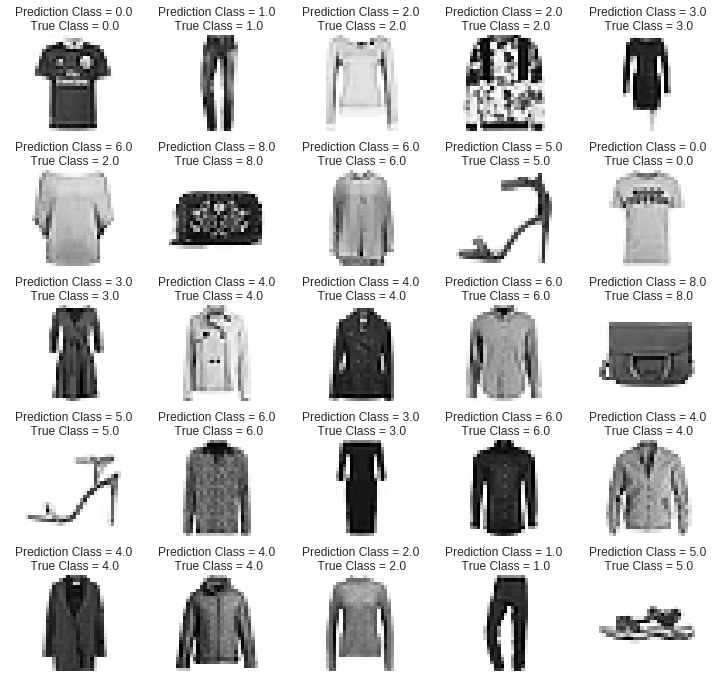

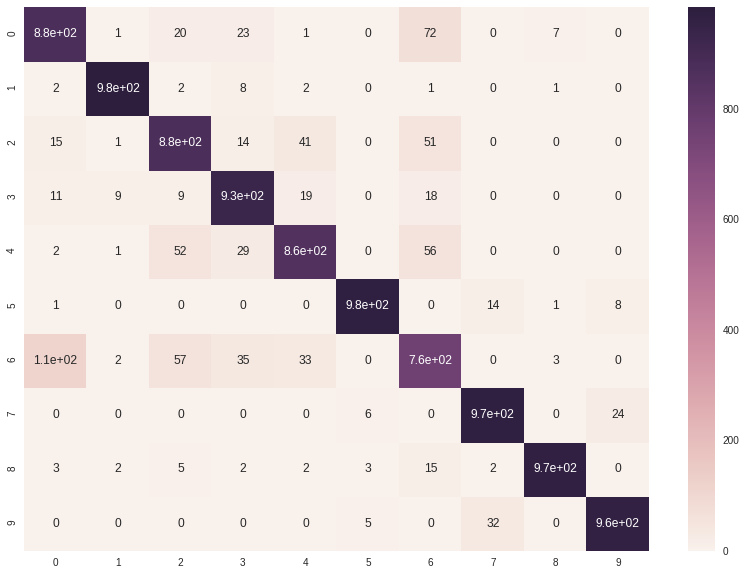

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))